## keras 방법
- 1) 데이터를 가져온다.
- 2) 데이터를 split한다. x_train, y_train, x_test, y_test
- 3) 그래프를 그린다.
- models.Sequential()
- 4) compile
- 5) fit
- 6) evaluate : test x, y를 넣어주면 정확도를 나타내준다.
- 7) predict : test x를 넣어주면 softmax값을 출력

In [1]:
import keras
keras.__version__

Using TensorFlow backend.
c:\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python

'2.3.1'

In [2]:
from keras. datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
print(len(train_labels), train_images.shape[0])
a, b, c, = train_images.shape
print(a, b, c)

60000 60000
60000 28 28


In [4]:
train_labels[4]

9

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_images)

10000

label은: 5


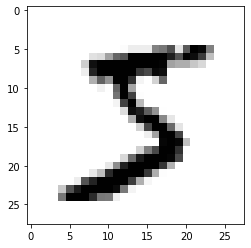

In [7]:
import matplotlib.pyplot as plt
digit = train_images[0]
digit.shape
print("label은:", train_labels[0])
# plt.imshow(digit)#, cmap=plt.cm.binary)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


- 학습할 데이터를 train, test로 나눠놨으면,
- keras models을 Sequential()로 network를 만든다.
- network모델에 이제는 레이어들을 그려놓겠다.
- network.add, layers.Dense(해당 layers에 노드수 정의, activation 정의, input_shape 정의)

## Compile해보자
- 학습에 필요한 optimizer, loss func, metrics 정의

In [9]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

## 데이터 전처리

In [10]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## 학습

In [12]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
network.summary()

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.2549 - accuracy: 0.9267
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1030 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0677 - accuracy: 0.9800
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0496 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0379 - accuracy: 0.9884
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
________

- dense_1 Param은 512 노드에 784 input 데이터가 들어오기에  512 * 784 = 401920이됌

In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 50us/step


In [14]:
print('test_acc', test_acc)

test_acc 0.9811000227928162


In [15]:
prediction = network.predict(test_images)

In [16]:
prediction[0]

array([9.8611219e-10, 2.8048112e-11, 1.1728954e-06, 7.7744735e-05,
       2.9874231e-13, 4.5395652e-07, 1.8834543e-13, 9.9992013e-01,
       9.9123291e-08, 3.5070110e-07], dtype=float32)

In [18]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [19]:
import numpy as np

np.argmax(prediction[0])

7

In [21]:
import matplotlib.pyplot as plt
digit = np.reshape(test_images[0], (28,28))

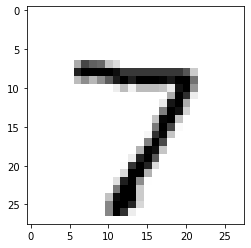

In [23]:
plt.imshow(digit)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()